In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

Data loading

In [10]:
def dataloader(path):
    df=pd.read_csv(path, sep=';')
    return(df)

In [11]:
path='AirQualityUCI.csv'
data=dataloader(path)

In [12]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [85]:
#data.isnull().sum()
data = data.dropna()
data.shape
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [14]:
def pre_processing(data):
    data = data.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)
    null_data = data[data.isnull().any(axis=1)]
    data = data.dropna()
    data = data.replace(-200, np.nan)
    data.isnull().sum()
    return data

In [15]:
data=pre_processing(data)

In [16]:
data.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,8991.000000,914.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000
mean,1099.833166,218.811816,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128
std,217.080037,204.459921,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288
min,647.000000,7.000000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000
25%,937.000000,67.000000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000
50%,1063.000000,150.000000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000
75%,1231.000000,297.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


In [17]:
data.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object

In [18]:
data.loc[:,'Datetime'] = data['Date'] + ' ' + data['Time']

In [19]:
from datetime import datetime
DateTime = []
for x in data['Datetime']:
    DateTime.append(datetime.strptime(x,'%d/%m/%Y %H.%M.%S'))


In [20]:
datetime = pd.Series(DateTime)
data.index = datetime

In [21]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
2004-03-10 18:00:00,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",10/03/2004 18.00.00
2004-03-10 19:00:00,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",10/03/2004 19.00.00
2004-03-10 20:00:00,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",10/03/2004 20.00.00
2004-03-10 21:00:00,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",10/03/2004 21.00.00
2004-03-10 22:00:00,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",10/03/2004 22.00.00


In [22]:
S1 = data['PT08.S1(CO)'].fillna(data['PT08.S1(CO)'].mean())
S2 = data['PT08.S2(NMHC)'].fillna(data['PT08.S1(CO)'].mean())
S3 = data['PT08.S3(NOx)'].fillna(data['PT08.S1(CO)'].mean())
S4 = data['PT08.S4(NO2)'].fillna(data['PT08.S1(CO)'].mean())
S5 = data['PT08.S5(O3)'].fillna(data['PT08.S1(CO)'].mean())


In [23]:
df = pd.DataFrame({'S1':S1, 'S2':S1, 'S3':S3, 'S4':S4, 'S5':S5})

In [24]:
len(df.columns)

5

Text(0.5, 1.0, 'S5')

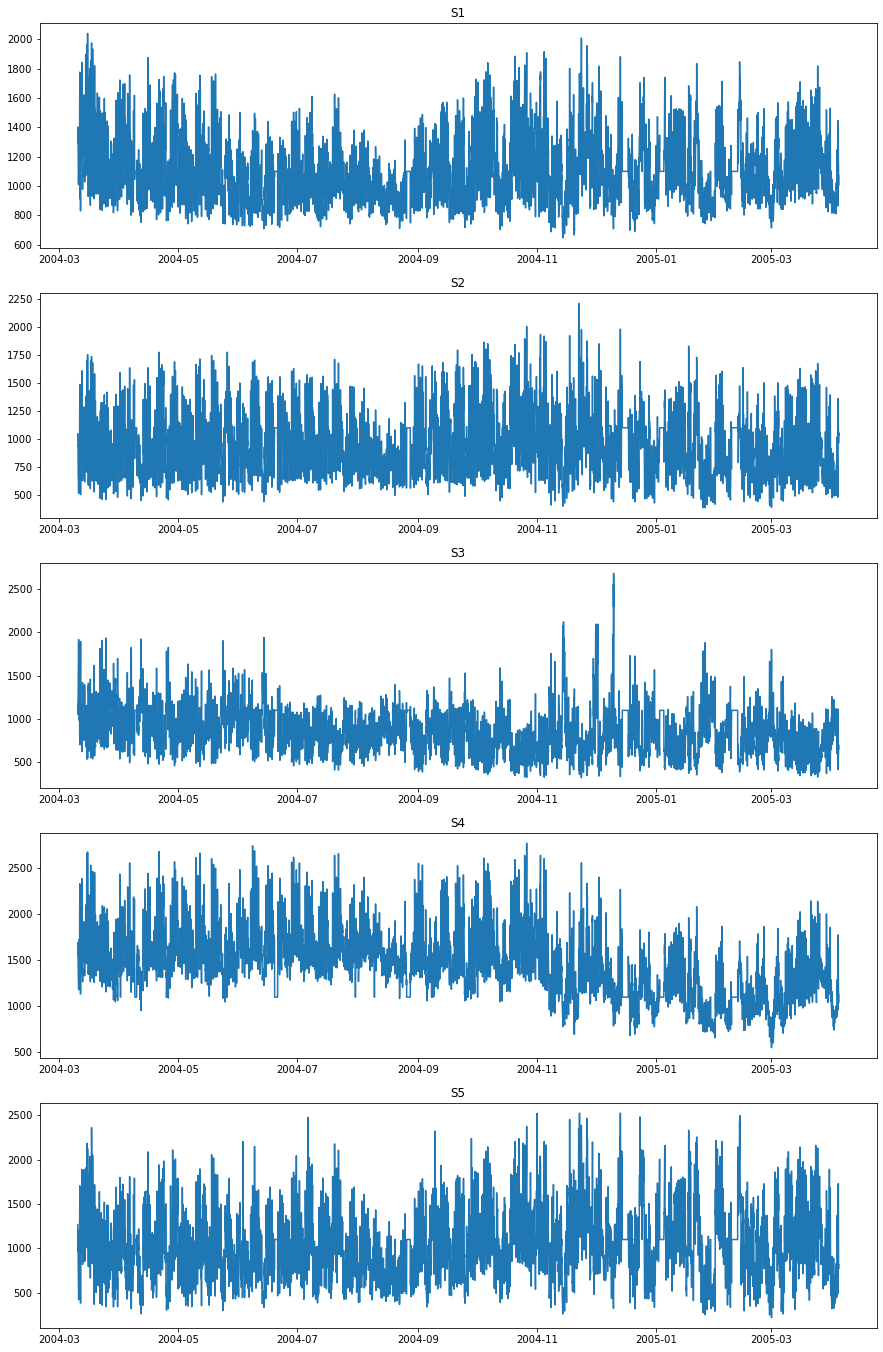

In [25]:
fig, axes = plt.subplots(5,1, figsize=(15,24))

axes[0].plot(S1)
axes[0].set_title ('S1')
axes[1].plot(S2)
axes[1].set_title ('S2')
axes[2].plot(S3)
axes[2].set_title ('S3')
axes[3].plot(S4)
axes[3].set_title ('S4')
axes[4].plot(S5)
axes[4].set_title ('S5')

Text(0.5, 1.0, 'S5')

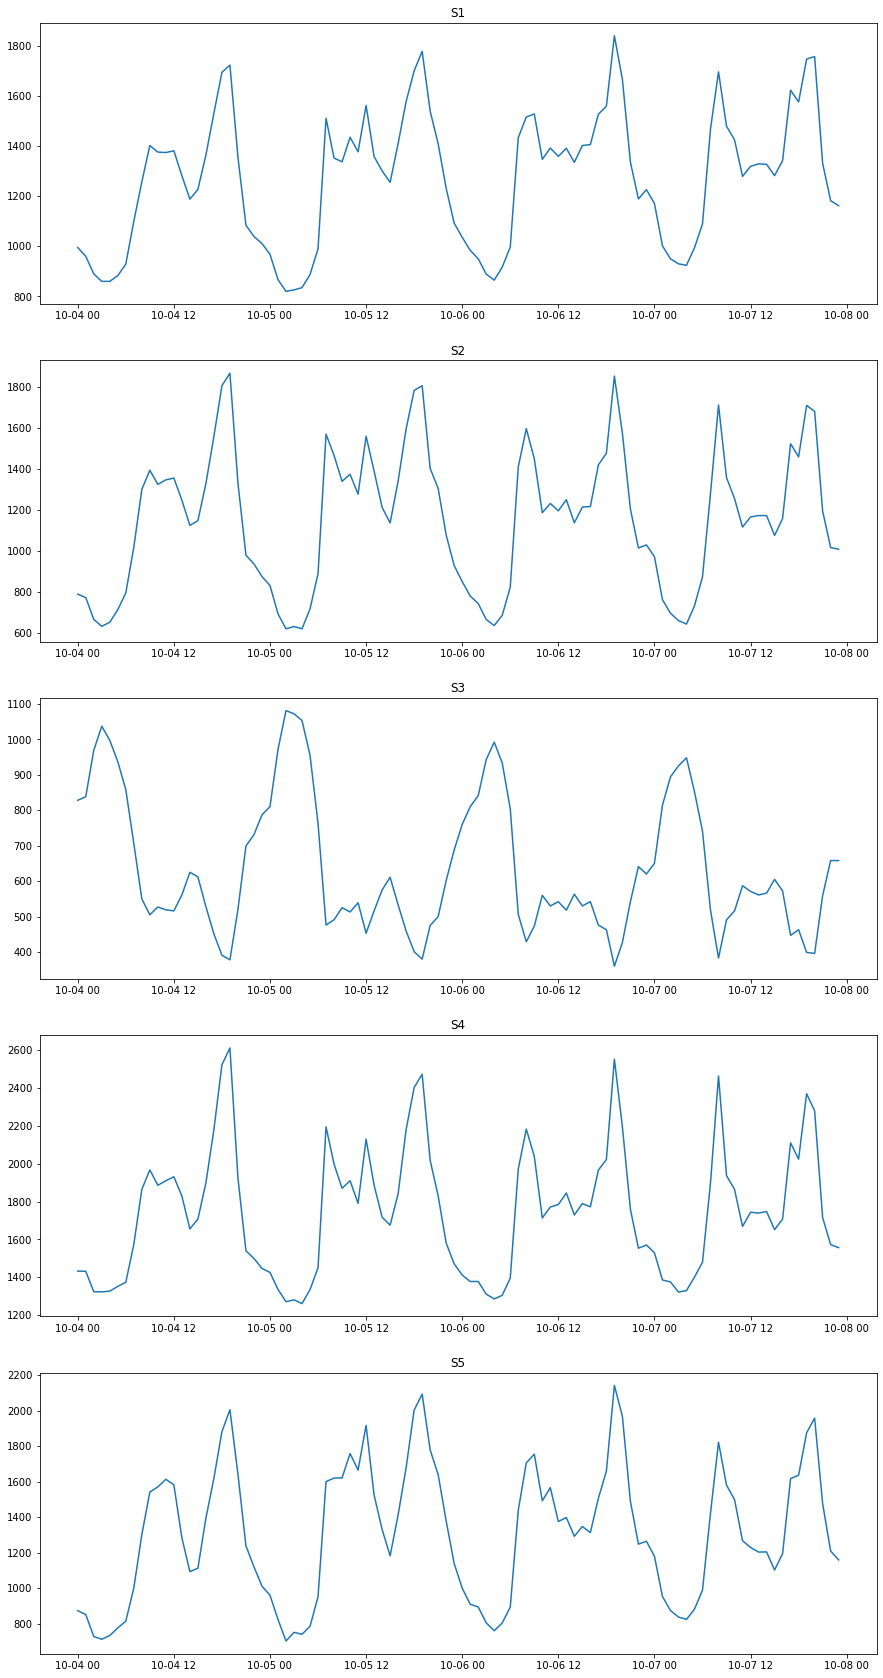

In [26]:
fig, axes = plt.subplots(5,1, figsize=(15,30))

axes[0].plot(S1['2004-10-04':'2004-10-07'])
axes[0].set_title ('S1')
axes[1].plot(S2['2004-10-04':'2004-10-07'])
axes[1].set_title ('S2')
axes[2].plot(S3['2004-10-04':'2004-10-07'])
axes[2].set_title ('S3')
axes[3].plot(S4['2004-10-04':'2004-10-07'])
axes[3].set_title ('S4')
axes[4].plot(S5['2004-10-04':'2004-10-07'])
axes[4].set_title ('S5')

Text(0, 0.5, 'S1_lagged')

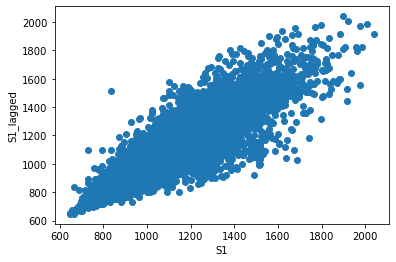

In [27]:
plt.scatter(S1, S1.shift())
plt.xlabel('S1')
plt.ylabel('S1_lagged')

In [28]:
S2_lagged = S2.shift()
pd.DataFrame({'real': S2, 'lagged': S2_lagged}).corr()

,real,lagged
real,1.000000,0.867996
lagged,0.867996,1.000000


Text(0, 0.5, 'S2_lagged')

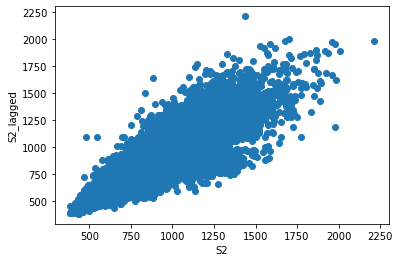

In [29]:
plt.scatter(S2, S2_lagged)
plt.xlabel('S2')
plt.ylabel('S2_lagged')

In [30]:
S3_lagged = S3.shift()
pd.DataFrame({'real': S3, 'lagged': S3_lagged}).corr()

,real,lagged
real,1.000000,0.906865
lagged,0.906865,1.000000


Text(0, 0.5, 'S3_lagged')

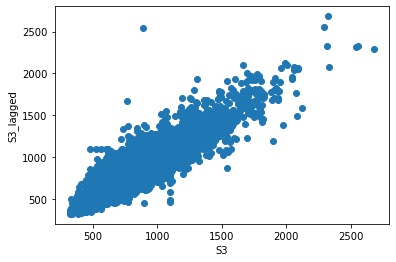

In [31]:
plt.scatter(S3, S3_lagged)
plt.xlabel('S3')
plt.ylabel('S3_lagged')

In [32]:
S4_lagged = S4.shift()
pd.DataFrame({'real': S4, 'lagged': S4_lagged}).corr()

,real,lagged
real,1.000000,0.912041
lagged,0.912041,1.000000


Text(0, 0.5, 'S4_lagged')

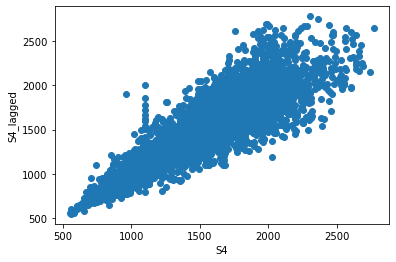

In [33]:
plt.scatter(S4, S4_lagged)
plt.xlabel('S4')
plt.ylabel('S4_lagged')

In [34]:
S5_lagged = S5.shift()
pd.DataFrame({'real': S5, 'lagged': S5_lagged}).corr()

,real,lagged
real,1.00000,0.89784
lagged,0.89784,1.00000


Text(0, 0.5, 'S5_lagged')

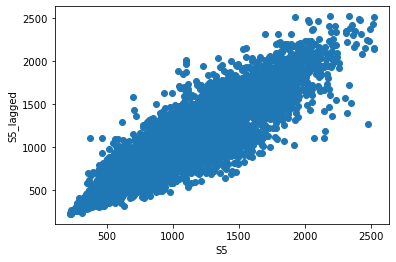

In [35]:
plt.scatter(S5, S5_lagged)
plt.xlabel('S5')
plt.ylabel('S5_lagged')


In [36]:
pd.DataFrame({'S1': S1, 'S2': S2, 'S3': S3, 'S4': S4, 'S5':S5}).corr()

,S1,S2,S3,S4,S5
S1,1.000000,0.886697,-0.756423,0.669149,0.898669
S2,0.886697,1.000000,-0.751618,0.732681,0.878273
S3,-0.756423,-0.751618,1.000000,-0.556839,-0.772379
S4,0.669149,0.732681,-0.556839,1.000000,0.571222
S5,0.898669,0.878273,-0.772379,0.571222,1.000000


Check Stationarity

In [37]:
from statsmodels.tsa.stattools import adfuller

In [38]:
def test_stationarity(timeseries):
    #Determing rolloing statistics
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()
    
    #Plot rolling statistics:
    orig = plt.plot (timeseries, color='blue', label='Original')
    mean = plt.plot (rolmean, color='red', label = 'Rolling Mean')
    std = plt.plot (rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('rolling Mean & Statndard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

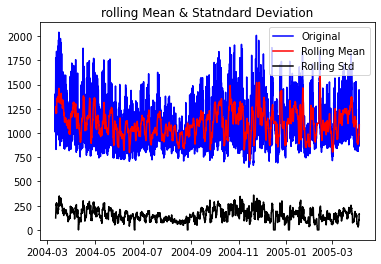

Results of Dickey-Fuller Test:
Test Statistic                -9.732395e+00
p-value                        8.932481e-17
#Lags Used                     3.800000e+01
Number of Observations Used    9.318000e+03
Critical Value (1%)           -3.431052e+00
Critical Value (5%)           -2.861850e+00
Critical Value (10%)          -2.566935e+00
dtype: float64


In [39]:
test_stationarity(S1)

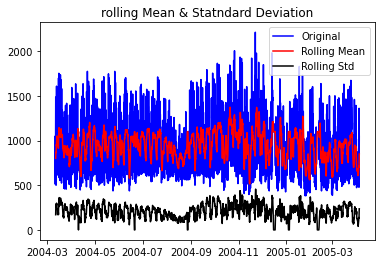

Results of Dickey-Fuller Test:
Test Statistic                -1.058973e+01
p-value                        6.575178e-19
#Lags Used                     3.700000e+01
Number of Observations Used    9.319000e+03
Critical Value (1%)           -3.431052e+00
Critical Value (5%)           -2.861850e+00
Critical Value (10%)          -2.566935e+00
dtype: float64


In [40]:
test_stationarity(S2)

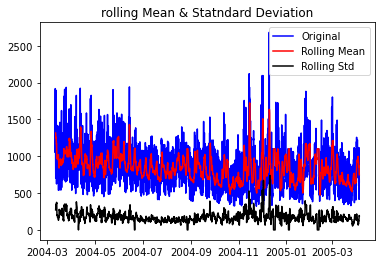

Results of Dickey-Fuller Test:
Test Statistic                -1.063251e+01
p-value                        5.170763e-19
#Lags Used                     3.600000e+01
Number of Observations Used    9.320000e+03
Critical Value (1%)           -3.431052e+00
Critical Value (5%)           -2.861850e+00
Critical Value (10%)          -2.566935e+00
dtype: float64


In [41]:
test_stationarity(S3)

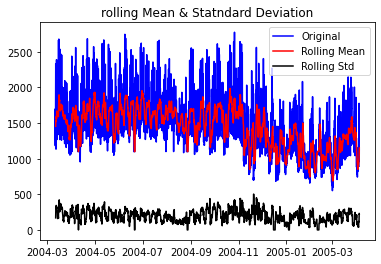

Results of Dickey-Fuller Test:
Test Statistic                -6.305468e+00
p-value                        3.331927e-08
#Lags Used                     3.700000e+01
Number of Observations Used    9.319000e+03
Critical Value (1%)           -3.431052e+00
Critical Value (5%)           -2.861850e+00
Critical Value (10%)          -2.566935e+00
dtype: float64


In [42]:
test_stationarity(S4)

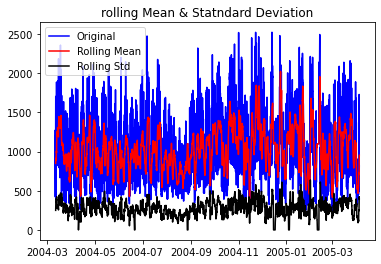

Results of Dickey-Fuller Test:
Test Statistic                -1.110077e+01
p-value                        3.870534e-20
#Lags Used                     3.600000e+01
Number of Observations Used    9.320000e+03
Critical Value (1%)           -3.431052e+00
Critical Value (5%)           -2.861850e+00
Critical Value (10%)          -2.566935e+00
dtype: float64


In [43]:
test_stationarity(S5)

In [44]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess

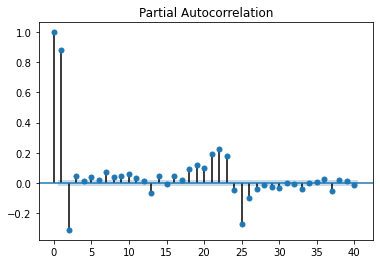

In [45]:
plot_pacf(S1);

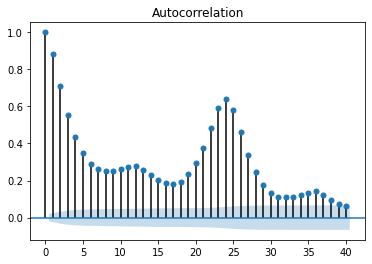

In [46]:
plot_acf(S1);

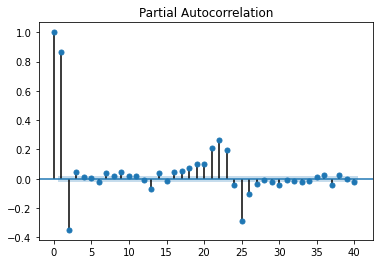

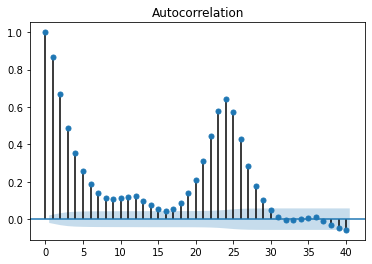

In [47]:
plot_pacf(S2);
plot_acf(S2);

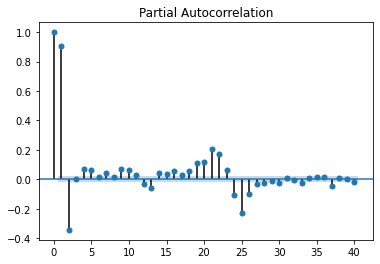

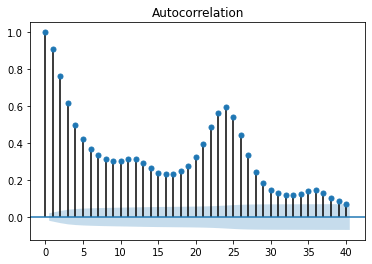

In [48]:
plot_pacf(S3);
plot_acf(S3);

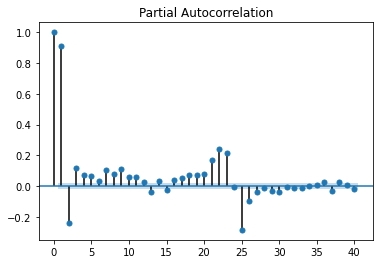

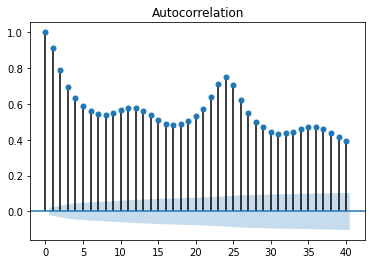

In [49]:
plot_pacf(S4);
plot_acf(S4);

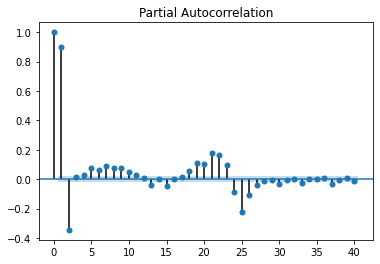

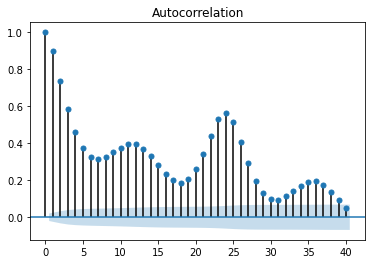

In [50]:
plot_pacf(S5);
plot_acf(S5);

In [51]:
import itertools
from statsmodels.tsa.arima_model import ARMA

In [52]:
p=q=range(0,4)
pq=list(itertools.product(p,q))
print(pq)

params=[]
AICs=[]
print()


[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]



In [58]:
for param in pq:
        mod=ARMA(df,order=param)
        result=mod.fit()
        print()
        print(f"parameter values for p,q {param}")
        print(f"ARMA{param} - AIC{result.aic}")
        params.append(param)
        AICs.append(result.aic)
    

ValueError: endog is required to have ndim 1 but has ndim 2

normailty check

(array([ 269., 1783., 2461., 2317., 1227.,  747.,  383.,  117.,   41.,
          12.]),
 array([ 647. ,  786.3,  925.6, 1064.9, 1204.2, 1343.5, 1482.8, 1622.1,
        1761.4, 1900.7, 2040. ]),
 <a list of 10 Patch objects>)

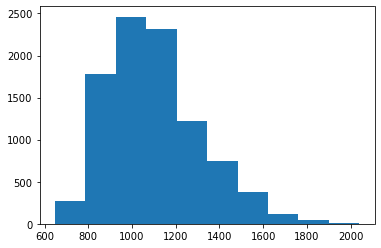

In [68]:
plt.hist(S1)

In [61]:
from statsmodels.graphics.gofplots import qqplot

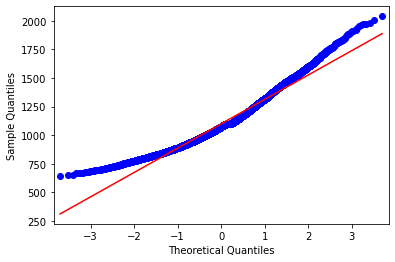

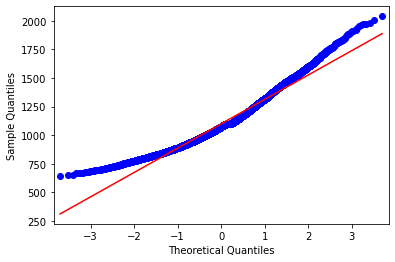

In [66]:
qqplot(S1, line='s')

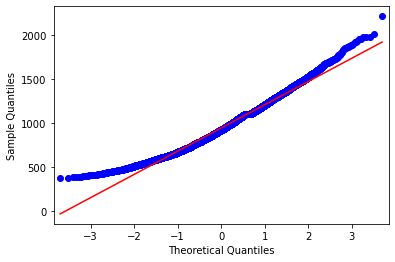

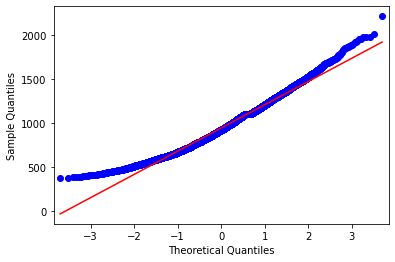

In [69]:
qqplot(S2, line='s')

In [70]:
from scipy.stats import shapiro

In [71]:
stat, p = shapiro(S1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.962, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
